### Dogs and cats Recognization CNN project

In [1]:
## importing all libaries...
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# E:\Deep Learning\data\cat-and-dog\test_set\test_set
Datadir=r"E:\Deep Learning\data\cat-and-dog\test_set\test_set"

In [3]:
CATAGORIES=["dogs","cats"]

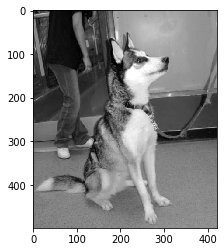

In [4]:
for i in CATAGORIES:
    path = os.path.join(Datadir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        break
    break

In [5]:
## create all size image in same size
img_size=100

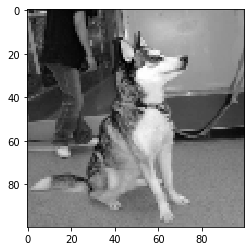

In [6]:
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
### Now we images to training sets...
training_data = []

In [8]:
def create_training_data():
    for i in CATAGORIES:
        path = os.path.join(Datadir,i)
        class_num = CATAGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
      
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

2023


In [10]:
### shuffle the data....
import random 
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[172, 172, 174, ..., 176, 176, 176],
       [172, 172, 174, ..., 176, 176, 176],
       [172, 172, 174, ..., 177, 177, 177],
       ...,
       [114, 140, 125, ..., 115, 125, 140],
       [137, 152, 158, ...,  98, 125, 140],
       [150, 149, 154, ...,  95, 120, 135]], dtype=uint8), 1]
[array([[206, 156,  25, ...,   6,   4,   4],
       [ 33, 202, 195, ...,   6,   4,   4],
       [ 49,  48, 186, ...,   4,   3,   4],
       ...,
       [227, 221, 198, ..., 143, 130, 132],
       [223, 231, 222, ..., 137, 126, 135],
       [225, 234, 210, ..., 120, 133, 135]], dtype=uint8), 0]
[array([[ 40,  19,  59, ...,  42,  37,  16],
       [ 46,  16,  60, ...,  41,  40,  19],
       [ 45,  13,  56, ...,  42,  38,  16],
       ...,
       [155, 160, 163, ..., 114,  86, 100],
       [149, 154, 157, ..., 108, 100, 105],
       [141, 146, 149, ..., 115, 112, 108]], dtype=uint8), 1]
[array([[ 68,  76,  78, ...,  49,  51,  45],
       [ 71,  75,  78, ...,  51,  53,  48],
       [ 70,  75,  80, ...

In [17]:
X = []  ## for the feature 
y = []  ## for the labels

In [18]:
for feature,label in training_data:
    X.append(feature)
    y.append(label)

print(X[0].reshape(-1,img_size,img_size,1))
# print('.........................')
X = np.array(X).reshape(-1,img_size,img_size,1)
# print(np.array(X).reshape(-1,img_size,img_size,1))

[[[[172]
   [172]
   [174]
   ...
   [176]
   [176]
   [176]]

  [[172]
   [172]
   [174]
   ...
   [176]
   [176]
   [176]]

  [[172]
   [172]
   [174]
   ...
   [177]
   [177]
   [177]]

  ...

  [[114]
   [140]
   [125]
   ...
   [115]
   [125]
   [140]]

  [[137]
   [152]
   [158]
   ...
   [ 98]
   [125]
   [140]]

  [[150]
   [149]
   [154]
   ...
   [ 95]
   [120]
   [135]]]]
.........................
[[[[172]
   [172]
   [174]
   ...
   [176]
   [176]
   [176]]

  [[172]
   [172]
   [174]
   ...
   [176]
   [176]
   [176]]

  [[172]
   [172]
   [174]
   ...
   [177]
   [177]
   [177]]

  ...

  [[114]
   [140]
   [125]
   ...
   [115]
   [125]
   [140]]

  [[137]
   [152]
   [158]
   ...
   [ 98]
   [125]
   [140]]

  [[150]
   [149]
   [154]
   ...
   [ 95]
   [120]
   [135]]]


 [[[206]
   [156]
   [ 25]
   ...
   [  6]
   [  4]
   [  4]]

  [[ 33]
   [202]
   [195]
   ...
   [  6]
   [  4]
   [  4]]

  [[ 49]
   [ 48]
   [186]
   ...
   [  4]
   [  3]
   [  4]]

  ...

  [[2

In [19]:
###converting preprose file into the file for direct use ....
import pickle
pickle_out = open("E:\Deep Learning\X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()
                  
pickle_out = open("E:\Deep Learning\y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [21]:
##note preprocesing img done...Now start Deep learning with CNN....